# TFT WIN

In [1]:
import pandas as pd

# Charger le fichier CSV
data = pd.read_csv('./tft.csv')

# Afficher les premières lignes pour vérifier
print(data.head())
print(data.info())
print(data.describe())

   patch_version         match_id  \
0          10.19  EUW1_4817498958   
1          10.19  EUW1_4817498958   
2          10.19  EUW1_4817498958   
3          10.19  EUW1_4817498958   
4          10.19  EUW1_4817498958   

                                               puuid  placement  level  \
0  KzseHzU3hoWVccjzPLRHVynRYxLT_Ww27nQpZSMXsa4YFp...          1      9   
1  0i6nCStgF5A3Bg-xmHvcS9Htjxo3t-BMcGBTfgG_VDc8H0...          2      9   
2  xbmh7BXRjtNjZaUGkiY7kPAbx85q6CqkmR2CpijLu9Icz7...          3      9   
3  O7P3r5EcNYdWWWaXR_pRtrE92G-Recxed8nwTCe5FsNBNG...          4      8   
4  OpwDkmPPsNS2P-1XKuR_jpDkScZFzPYYbk4eUJ8gMTfVV-...          5      8   

   gold_left  last_round  time_in_game  total_dmg_to_players  \
0         22          40   2461.936768                   181   
1          1          40   2461.936768                   161   
2          1          37   2279.858154                   116   
3          1          35   2189.656006                   125   
4          2

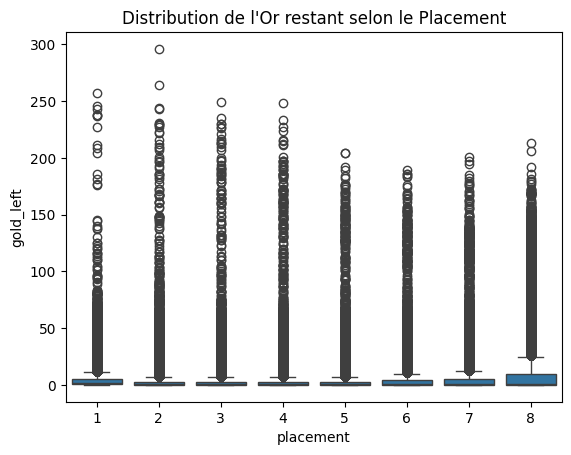

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='placement', y='gold_left', data=data)
plt.title('Distribution de l\'Or restant selon le Placement')
plt.show()

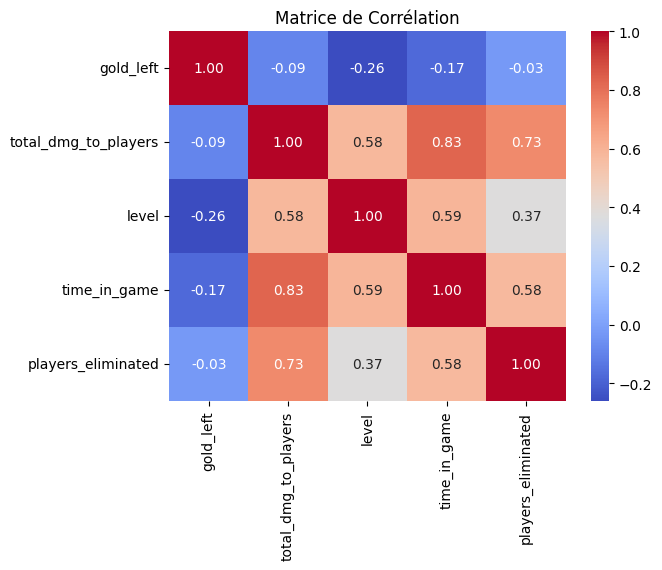

In [3]:
# Calcul de la matrice de corrélation
corr = data[['gold_left', 'total_dmg_to_players', 'level', 'time_in_game', 'players_eliminated']].corr()

# Affichage de la matrice de corrélation
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()


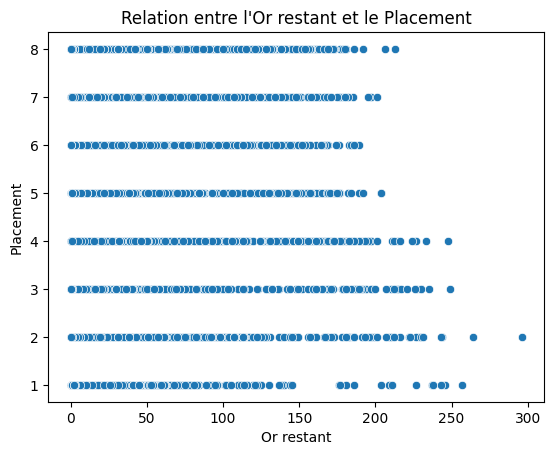

In [4]:
sns.scatterplot(x='gold_left', y='placement', data=data)
plt.title('Relation entre l\'Or restant et le Placement')
plt.xlabel('Or restant')
plt.ylabel('Placement')
plt.show()

KeyboardInterrupt: 

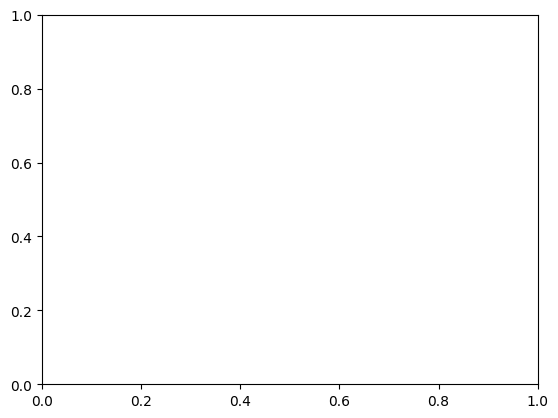

In [6]:
sns.lineplot(x='time_in_game', y='placement', data=data)
plt.title('Evolution du Placement en fonction du Temps de Jeu')
plt.xlabel('Temps de Jeu')
plt.ylabel('Placement')
plt.show()

In [7]:
# Compter la fréquence des traits
traits = [trait for sublist in data['traits'].apply(eval).values() for trait in sublist]
trait_counts = pd.Series(traits).value_counts()
trait_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Répartition des Traits')
plt.ylabel('')
plt.show()

KeyboardInterrupt: 

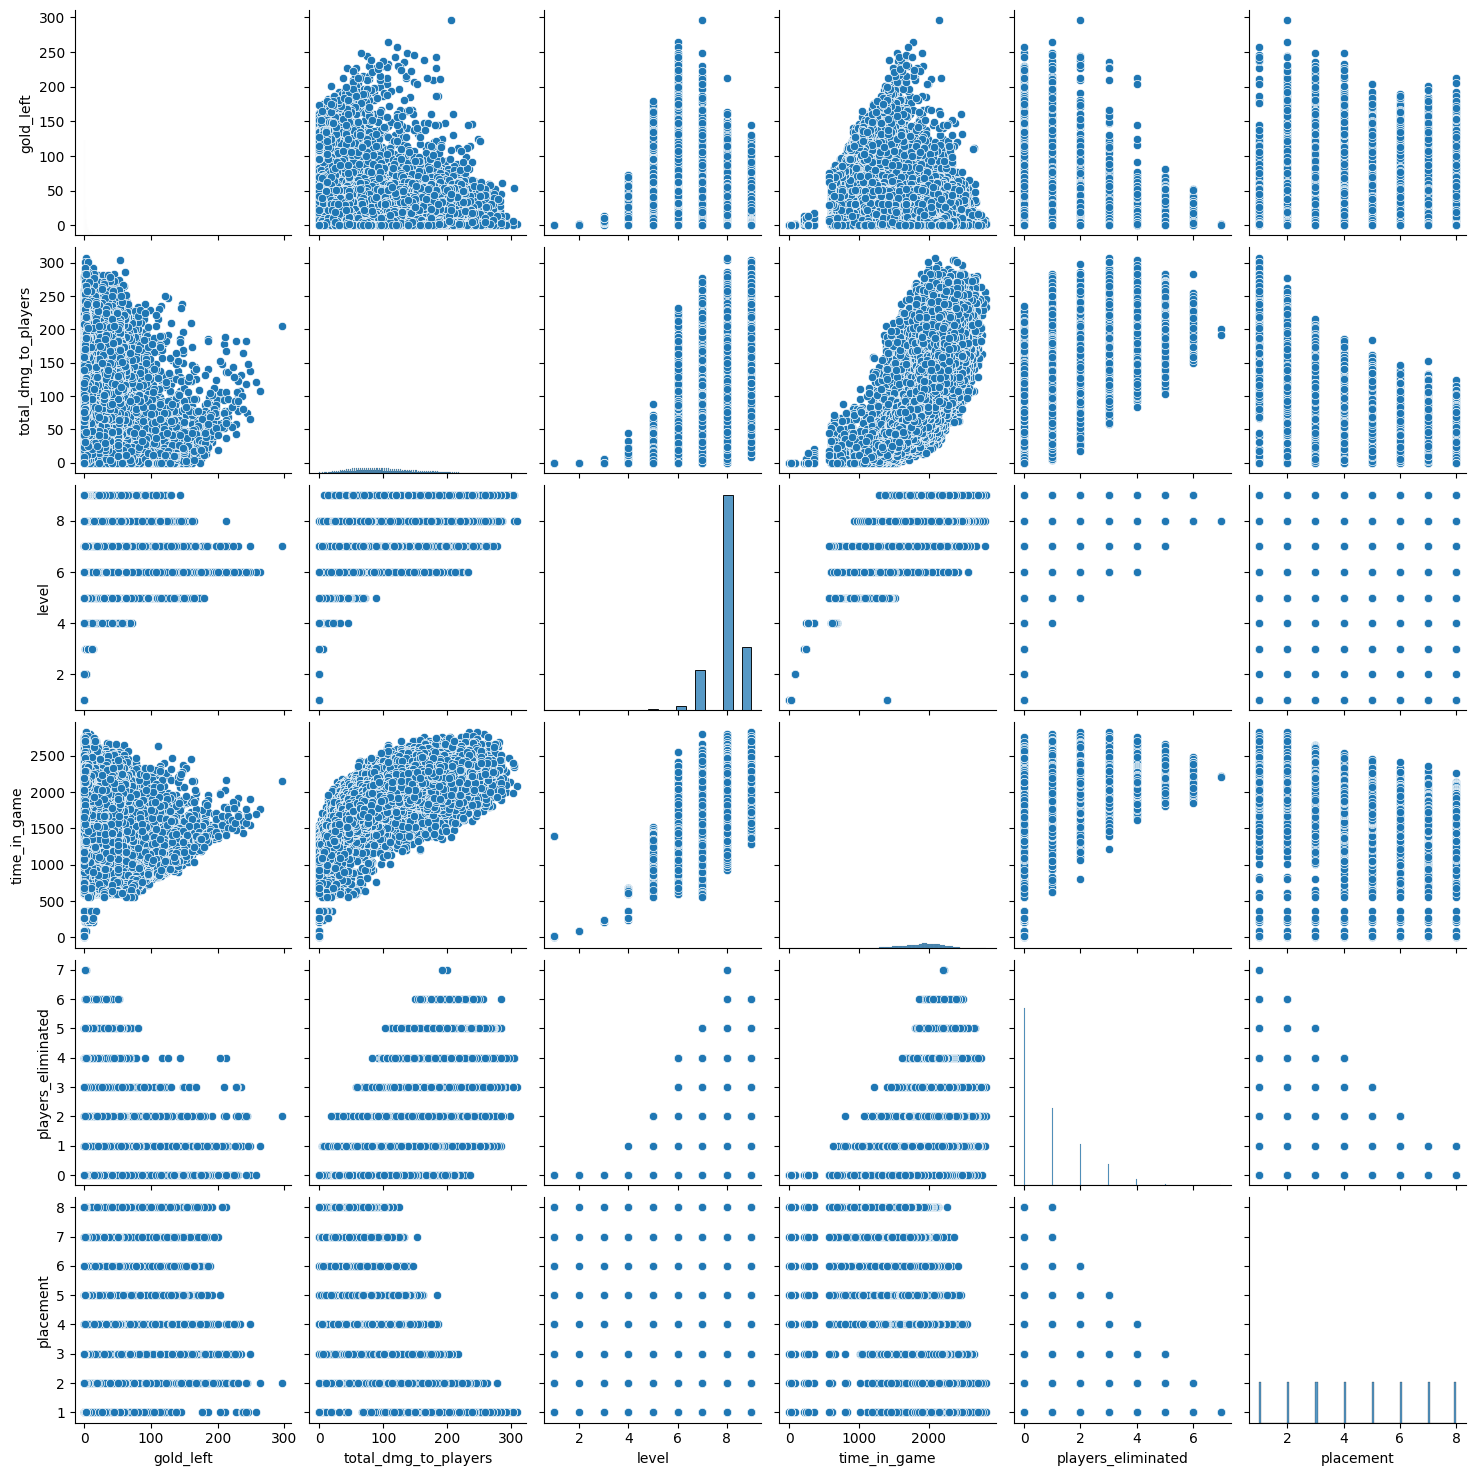

In [8]:
sns.pairplot(data[['gold_left', 'total_dmg_to_players', 'level', 'time_in_game', 'players_eliminated', 'placement']])
plt.show()

In [9]:
print(data['traits'].head())

0    {'Divine': 1, 'Emperor': 1, 'Fortune': 3, 'Kee...
1    {'Cultist': 8, 'Divine': 1, 'Duelist': 2, 'Dus...
2    {'Cultist': 6, 'Emperor': 1, 'Keeper': 2, 'Ass...
3    {'Boss': 1, 'Dusk': 1, 'Assassin': 1, 'Brawler...
4    {'Divine': 2, 'Hunter': 3, 'Adept': 2, 'Brawle...
Name: traits, dtype: object


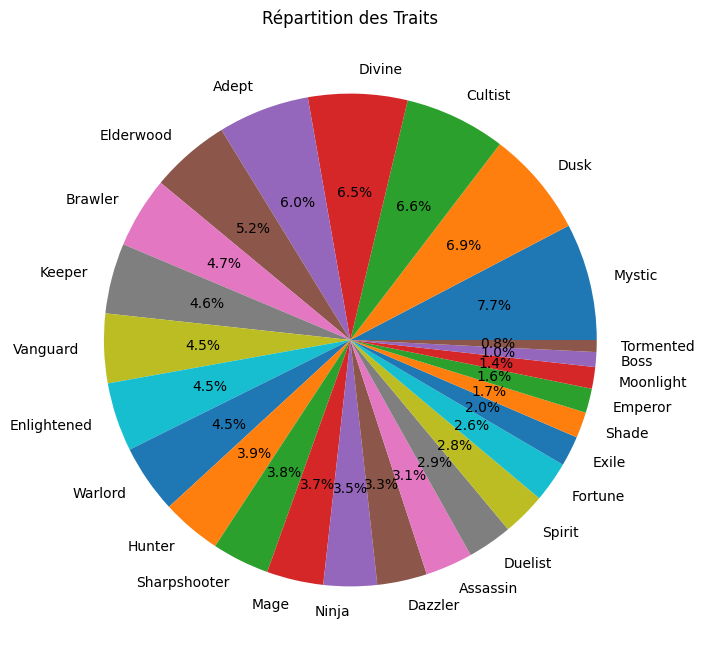

In [10]:
data['traits'] = data['traits'].apply(eval)

traits = []
for sublist in data['traits']:
    for trait, count in sublist.items():
        traits.extend([trait] * count)  

trait_counts = pd.Series(traits).value_counts()

trait_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8))

plt.title('Répartition des Traits')
plt.ylabel('')  
plt.show()

## GESTION DES DONNEES

In [11]:
print(data.isnull().sum())
data = data.drop(columns=['chosen_unit', 'gold_left', 'chosen_trait', 'patch_version', 'match_id', 'puuid', 'units', 'traits'])
data['won'] = data['placement'].apply(lambda x: 1 if x <= 4 else 0)


patch_version               0
match_id                    0
puuid                       0
placement                   0
level                       0
gold_left                   0
last_round                  0
time_in_game                0
total_dmg_to_players        0
players_eliminated          0
chosen_unit             90260
chosen_trait            96325
units                       0
traits                      0
dtype: int64


In [12]:
print(data.isnull().sum())


placement               0
level                   0
last_round              0
time_in_game            0
total_dmg_to_players    0
players_eliminated      0
won                     0
dtype: int64


In [13]:
print(data.columns)

Index(['placement', 'level', 'last_round', 'time_in_game',
       'total_dmg_to_players', 'players_eliminated', 'won'],
      dtype='object')


In [ ]:
# import ast
# df_traits_encoded = data['traits'].apply(lambda x: ','.join(x.keys())).str.get_dummies(sep=',')
# df = pd.concat([data, df_traits_encoded], axis=1)


# print(df_traits_encoded.head())
# print(df.head())

# data['traits'] = data['traits'].apply(ast.literal_eval)
# df_traits_encoded = data['traits'].apply(lambda x: ','.join(x.keys())).str.get_dummies(sep=',')
# df = pd.concat([data, df_traits_encoded], axis=1)
# print(df_traits_encoded.head())
# print(df.head())

KeyError: 'traits'

In [ ]:
# print(data['traits'].head())
# df.drop(columns=['traits'], inplace=True)

KeyError: 'traits'

In [16]:
print(data.columns)

Index(['placement', 'level', 'last_round', 'time_in_game',
       'total_dmg_to_players', 'players_eliminated', 'won'],
      dtype='object')


In [18]:
print(data.dtypes)

placement                 int64
level                     int64
last_round                int64
time_in_game            float64
total_dmg_to_players      int64
players_eliminated        int64
won                       int64
dtype: object


In [19]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['level', 'last_round', 'time_in_game', 'total_dmg_to_players', 'players_eliminated']
scaler = StandardScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [21]:
X = data.drop(columns=['placement', 'won'])  
y = data['won']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [24]:
print(data.dtypes)

placement                 int64
level                   float64
last_round              float64
time_in_game            float64
total_dmg_to_players    float64
players_eliminated      float64
won                       int64
dtype: object


PLEIN DE REGRETION LINEAIRE (INUTILE DANS MON CAS)

In [25]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import mean_squared_error

y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"RMSE: {rmse}")

RMSE: 0.3103046053052385


In [28]:
import numpy as np

new_data = {
    'level': [4],
    'gold_left': [0],
    'last_round': [10],
    'time_in_game': [10],
    'total_dmg_to_players': [0],
    'players_eliminated': [0],
}

new_data_df = data.reindex(columns=X_train.columns, fill_value=0)

new_data_df = pd.DataFrame(new_data)

# Aligner les colonnes avec X_train
new_data_df = new_data_df.reindex(columns=X_train.columns, fill_value=0)

predicted_placement = model1.predict(new_data_df)
result = 'gagné' if predicted_placement[0] > 0.5 else 'perdu'
print(f"Le joueur a {result} la partie.")

Le joueur a gagné la partie.


In [29]:
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor()

In [127]:

y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"RMSE: {rmse}")

RMSE: 0.0


In [30]:
import numpy as np

new_data = {
    'level': [0],
    'gold_left': [0],
    'last_round': [10],
    'time_in_game': [10],
    'total_dmg_to_players': [0],
    'players_eliminated': [0],
}

new_data_df = data.reindex(columns=X_train.columns, fill_value=0)

new_data_df = pd.DataFrame(new_data)

# Aligner les colonnes avec X_train
new_data_df = new_data_df.reindex(columns=X_train.columns, fill_value=0)

predicted_placement = model2.predict(new_data_df)
result = 'gagné' if predicted_placement[0] > 0.5 else 'perdu'
print(f"Le joueur a {result} la partie.")

Le joueur a perdu la partie.


In [135]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge) ** 0.5
print(f"RMSE (Ridge) : {rmse_ridge}")

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso) ** 0.5
print(f"RMSE (Lasso) : {rmse_lasso}")

RMSE (Ridge) : 0.2417310721284345
RMSE (Lasso) : 0.24812117459985003


In [137]:
import numpy as np

new_data = {
    'level': [0],
    'gold_left': [0],
    'last_round': [10],
    'time_in_game': [10],
    'total_dmg_to_players': [0],
    'players_eliminated': [0],
}

new_data_df = df.reindex(columns=X_train.columns, fill_value=0)

new_data_df = pd.DataFrame(new_data)

# Aligner les colonnes avec X_train
new_data_df = new_data_df.reindex(columns=X_train.columns, fill_value=0)

predicted_placement = ridge_model.predict(new_data_df)
result = 'gagné' if predicted_placement[0] > 0.5 else 'perdu'
print(f"Le joueur a {result} la partie.")
print(predicted_placement[0])

Le joueur a gagné la partie.
1.9017667871566077


DE LA CLASSIFICATION !!!!

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8872925373532907
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89    149656
           1       0.89      0.89      0.89    149916

    accuracy                           0.89    299572
   macro avg       0.89      0.89      0.89    299572
weighted avg       0.89      0.89      0.89    299572



In [35]:

#Le joueur a très certainement perdu la partie avec ces données la 
player = {
    'level': 1,
    'last_round': 4,
    'time_in_game': 12,
    'total_dmg_to_players': 0,
    'players_eliminated': 0
}

playerDf = pd.DataFrame([player])
result = model.predict(playerDf)[0]
print(result)
if result == 1:
    print("Le joueur a gagné (placement <= 4)")
else:
    print("Le joueur n'a pas gagné (placement > 4)")

0
Le joueur n'a pas gagné (placement > 4)


In [ ]:

#Le joueur a très certainement perdu la partie avec ces données la 
player = {
    'level': 1,
    'last_round': 4,
    'time_in_game': 12,
    'total_dmg_to_players': 0,
    'players_eliminated': 0
}

playerDf = pd.DataFrame([player])
result = model.predict(playerDf)[0]
print(result)
if result == 1:
    print("Le joueur a gagné (placement <= 4)")
else:
    print("Le joueur n'a pas gagné (placement > 4)")